#**Wholesale Dataset**


ไฟล์ "Wholesale customers data.csv" (download จาก https://archive.ics.uci.edu/ml/machine-learning-databases/00292/) เป็นข้อมูลเกี่ยวกับยอดการขายสินค้าประเภทต่างๆ ในแต่ละภูมิภาค ผ่าน 2 ช่องทาง คือ Horeca (Hotel/Restaurant/Cafe) หรือ Retail จาก UCI Machine Learning Repository โดยแถวแรกเป็นชื่อคอลัมน์ และ แถวที่ 2 เป็นต้นไปเก็บข้อมูล

ประเภทของสินค้า คือ fresh products, milk products, grocery products, forzen products, detergents and papers และ delicatessen

คอลัมน์ CHANNEL เป็นช่องทางการขาย ที่มีค่าเป็น Horeca (Hotel/Restaurant/Cafe) หรือ Retail (1,2)
คอลัมน์ REGION: เป็นภูมิภาค ได้แก่ Lisnon, Oporto หรือ Other (1,2,3)
คอลัมน์ FRESH, MILK, GROCERY, FROZEN, DETERGENTS_PAPER, DELICATESSEN เป็นยอดขายของสินค้าแต่ละประเภทในภูมิภาคนั้น ผ่านช่องทางนั้นในหนึ่งปี



1) เขียนโปรแกรมเพื่อแปลงข้อมูลช่องทางการขายและภูมิภาค จากตัวเลขให้เป็นชื่อของแต่ละช่องทางการขายและภูมิภาคนั้น ๆ จากนั้นบันทึกเป็นไฟล์ใหม่ที่มีชื่อว่า Rename_Wholesale.csv โดยจะใช้ไฟล์นี้เป็นหลักในข้อถัดไป

2) เขียนโปรแกรมเพื่อหายอดขายรวมจากทุกช่องทาง ในทุกภูมิภาค สำหรับสินค้าแต่ละประเภทแล้ววาด pie chart

3) เขียนโปรแกรมเพื่อหายอดขายรวมของสินค้าทุกประเภท ในทุกช่องทาง สำหรับแต่ละภูมิภาคแล้ววาด pie chart

4) เขียนโปรแกรมเพื่อหายอดขายรวมของสินค้าสำหรับทำความสะอาดในแต่ละช่องทางการขาย โดยแบ่งเป็นของแต่ละภูมิภาค พร้อมพล็อตกราฟของแต่ละภูมิภาค

5) เขียนโปรแกรมเพื่อหาจำนวน record ที่ยอดขายของอาหารสดรวมกับอาหารแช่แข็งผ่านช่องทาง Horeca(Hotel/Restaurant/Cafe) ไม่เกิน 1,000 ชิ้น

6) เขียนโปรแกรมเพื่อหาภูมิภาคที่มีการบริโภคนมมากที่สุด และในภูมิภาคนั้นมีการบริโภคนมมากกว่าอาหารสดทั้งหมดกี่ record

##1) เขียนโปรแกรมเพื่อแปลงข้อมูลช่องทางการขายและภูมิภาค จากตัวเลขให้เป็นชื่อของแต่ละช่องทางการขายและภูมิภาคนั้น ๆ จากนั้นบันทึกเป็นไฟล์ใหม่ที่มีชื่อว่า Rename_Wholesale.csv โดยจะใช้ไฟล์นี้เป็นหลักในข้อถัดไป

In [19]:
#Solution
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('Wholesale customers data.csv')
df.loc[df['Channel'] == 1, 'Channel'] = 'Horeca'
df.loc[df['Channel'] == 2, 'Channel'] = 'Retail'
df.loc[df['Region'] == 1, 'Region'] = 'Lisnon'
df.loc[df['Region'] == 2, 'Region'] = 'Oporto'
df.loc[df['Region'] == 3, 'Region'] = 'Other'
df.to_csv('Rename_Wholesale.csv')
df = pd.read_csv('Rename_Wholesale.csv') 
df

,Unnamed: 0,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0,Retail,Other,12669,9656,7561,214,2674,1338
1,1,Retail,Other,7057,9810,9568,1762,3293,1776
2,2,Retail,Other,6353,8808,7684,2405,3516,7844
3,3,Horeca,Other,13265,1196,4221,6404,507,1788
4,4,Retail,Other,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...,...
435,435,Horeca,Other,29703,12051,16027,13135,182,2204
436,436,Horeca,Other,39228,1431,764,4510,93,2346
437,437,Retail,Other,14531,15488,30243,437,14841,1867
438,438,Horeca,Other,10290,1981,2232,1038,168,2125


##2) เขียนโปรแกรมเพื่อหายอดขายรวมจากทุกช่องทาง ในทุกภูมิภาค สำหรับสินค้าแต่ละประเภทแล้ววาด pie chart



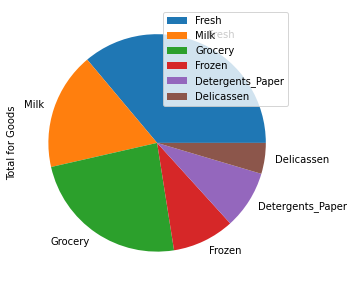

In [174]:
#Solution
df2 = pd.DataFrame({'Total for Goods': [df['Fresh'].sum(),df['Milk'].sum(),df['Grocery'].sum(),df['Frozen'].sum(),df['Detergents_Paper'].sum(),df['Delicassen'].sum()]},
                  index=['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen'])
plot = df2.plot.pie(y='Total for Goods', figsize=(5, 5))

##3) เขียนโปรแกรมเพื่อหายอดขายรวมของสินค้าทุกประเภท ในทุกช่องทาง สำหรับแต่ละภูมิภาคแล้ววาด pie chart

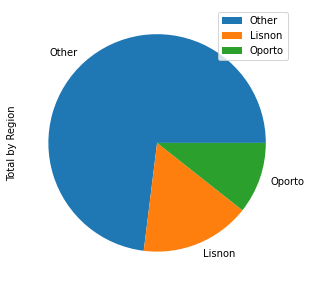

In [175]:
#Solution
Other = df.loc[df['Region']=='Other','Fresh'].sum() + df.loc[df['Region']=='Other','Frozen'].sum() +  df.loc[df['Region']=='Other','Milk'].sum() + df.loc[df['Region']=='Other','Grocery'].sum() + df.loc[df['Region']=='Other','Detergents_Paper'].sum() + df.loc[df['Region']=='Other','Delicassen'].sum()
Lisnon = df.loc[df['Region']=='Lisnon','Fresh'].sum() + df.loc[df['Region']=='Lisnon','Frozen'].sum() +  df.loc[df['Region']=='Lisnon','Milk'].sum() + df.loc[df['Region']=='Lisnon','Grocery'].sum() + df.loc[df['Region']=='Lisnon','Detergents_Paper'].sum() + df.loc[df['Region']=='Lisnon','Delicassen'].sum()
Oporto = df.loc[df['Region']=='Oporto','Fresh'].sum() + df.loc[df['Region']=='Oporto','Frozen'].sum() +  df.loc[df['Region']=='Oporto','Milk'].sum() + df.loc[df['Region']=='Oporto','Grocery'].sum() + df.loc[df['Region']=='Oporto','Detergents_Paper'].sum() + df.loc[df['Region']=='Oporto','Delicassen'].sum()
df3 = pd.DataFrame({'Total by Region': [Other, Lisnon, Oporto]},
                  index=['Other', 'Lisnon', 'Oporto'])
plot = df3.plot.pie(y='Total by Region', figsize=(5, 5))

##4) เขียนโปรแกรมเพื่อหายอดขายรวมของสินค้าสำหรับทำความสะอาดในแต่ละช่องทางการขาย โดยแบ่งเป็นของแต่ละภูมิภาค พร้อมพล็อตกราฟของแต่ละภูมิภาค

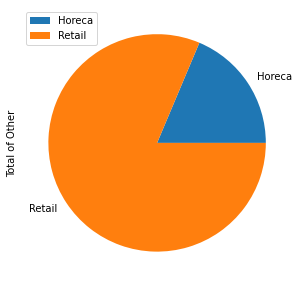

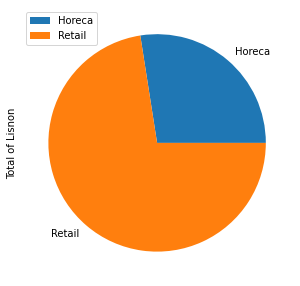

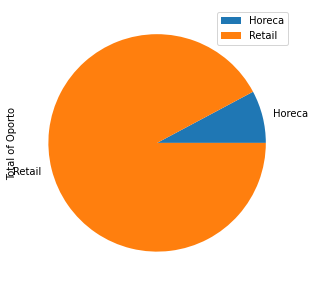

In [176]:
#Solution
df4_other = pd.DataFrame({'Total of Other': [df.loc[(df['Channel']=='Horeca')&(df['Region']=='Other'),'Detergents_Paper'].sum(),df.loc[(df['Channel']=='Retail')&(df['Region']=='Other'),'Detergents_Paper'].sum()]},
                  index=['Horeca', 'Retail'])
df4_lisnon = pd.DataFrame({'Total of Lisnon': [df.loc[(df['Channel']=='Horeca')&(df['Region']=='Lisnon'),'Detergents_Paper'].sum(),df.loc[(df['Channel']=='Retail')&(df['Region']=='Lisnon'),'Detergents_Paper'].sum()]},
                  index=['Horeca', 'Retail'])
df4_oporto = pd.DataFrame({'Total of Oporto': [df.loc[(df['Channel']=='Horeca')&(df['Region']=='Oporto'),'Detergents_Paper'].sum(),df.loc[(df['Channel']=='Retail')&(df['Region']=='Oporto'),'Detergents_Paper'].sum()]},
                  index=['Horeca', 'Retail'])
plot = df4_other.plot.pie(y='Total of Other', figsize=(5, 5))
plot = df4_lisnon.plot.pie(y='Total of Lisnon', figsize=(5, 5))
plot = df4_oporto.plot.pie(y='Total of Oporto', figsize=(5, 5))



##5) เขียนโปรแกรมเพื่อหาจำนวนปีที่ยอดขายของอาหารสดรวมกับอาหารแช่แข็งผ่านช่องทาง Horeca(Hotel/Restaurant/Cafe) ไม่เกิน 1,000 ชิ้น

In [122]:
#Solution
sum_ff = df.loc[(df['Channel']=='Horeca')&(df['Fresh'] + df['Frozen'] < 1000)].count()
df5['sum_ff'] = sum_ff
df5

Unnamed: 0                                                         10
Channel                                                            10
Region                                                             10
Fresh                                                              10
Milk                                                               10
Grocery                                                            10
Frozen                                                             10
Detergents_Paper                                                   10
Delicassen                                                         10
sum_ff              Unnamed: 0          10
Channel             10
...
dtype: object

##6) เขียนโปรแกรมเพื่อหาภูมิภาคที่มีการบริโภคนมมากที่สุด และในภูมิภาคนั้นมีการบริโภคนมมากกว่าอาหารสดทั้งหมดกี่ปี

In [173]:
#Solution
other_m = df.loc[(df['Region'] == 'Other'),'Milk'].sum()
oporto_m = df.loc[(df['Region'] == 'Oporto'),'Milk'].sum()
lisnon_m = df.loc[(df['Region'] == 'Lisnon'),'Milk'].sum()
max_m = ''
if (other_m > oporto_m) and (other_m > lisnon_m) : 
    max_m = 'Other'
    print('The most is ' + max_m )
elif oporto_m > lisnon_m:
     print('The most is', max_m='Oporto')
else: print('The most is', max_m='Lisnon') 
df.loc[(df['Region']== max_m) & (df['Milk']>df['Fresh'])].count()




The most is Other


Unnamed: 0          107
Channel             107
Region              107
Fresh               107
Milk                107
Grocery             107
Frozen              107
Detergents_Paper    107
Delicassen          107
dtype: int64